<a href="https://colab.research.google.com/github/SCE-ECS/sce-ecs-tests/blob/main/01_turbulence_lfde_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SCE–ECS Tier-3 LFDE Test (Turbulence Example: HIT-like Data)

Denna notebook visar hur Tier-3 LFDE-reciprocitetstestet körs på
en turbulensdataset (HIT-liknande) via konfigfilen `configs/turbulence_hit.yaml`.

Alla dataset-specifika val ligger i YAML-filen.
LFDE-avatar och metrik är oförändrade mellan olika datasets.


In [1]:
# Klona repo och installera beroenden
!rm -rf sce-ecs-tests
!git clone https://github.com/SCE-ECS/sce-ecs-tests.git
%cd sce-ecs-tests

!pip install -r requirements.txt


Cloning into 'sce-ecs-tests'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 143 (delta 45), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (143/143), 42.51 KiB | 6.07 MiB/s, done.
Resolving deltas: 100% (45/45), done.
/content/sce-ecs-tests
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 82.9 MB/s eta 0:00:00


In [5]:
import os, sys

# Se till att vi står i repo-roten
os.chdir("/content/sce-ecs-tests")

# 1) Sätt PYTHONPATH för underskal (t.ex. !python) – bra för skript
os.environ["PYTHONPATH"] = "/content/sce-ecs-tests/src"
print("PYTHONPATH (env):", os.environ["PYTHONPATH"])

# 2) Lägg även till src/ i sys.path – behövs för imports i notebooken
src_path = "/content/sce-ecs-tests/src"
if src_path not in sys.path:
    sys.path.append(src_path)

print("Finns src i sys.path?", src_path in sys.path)

PYTHONPATH (env): /content/sce-ecs-tests/src
Finns src i sys.path? True


In [3]:
# Välj vilken konfigfil som ska användas
config_path = "configs/turbulence_hit.yaml"  # ändra till annan YAML vid behov
print("Using config:", config_path)


Using config: configs/turbulence_hit.yaml


In [6]:
from sceecs_tests.config import load_config

cfg = load_config(config_path)
cfg


{'dataset': 'HIT_isotropic1024',
 'domain': 'turbulence',
 'data_root': '/content/sce-ecs-tests/data/HIT',
 'subdirs': {'raw': 'raw', 'processed': 'processed'},
 'files': {'velocity_raw': 'raw/hit_isotropic1024_velocity.bin',
  'metadata_raw': 'raw/hit_isotropic1024_meta.json'},
 'lfde': {'ks_values': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0],
  'output_csv': 'results/sample_runs/hit_lfde_reciprocity.csv',
  'output_plot': 'results/sample_runs/hit_lfde_reciprocity.png'}}

In [7]:
# Kör LFDE-pipelinen med vald config
!python scripts/lfde_reciprocity/run_lfde_sweep.py --config {config_path}


Saved CSV to results/sample_runs/hit_lfde_reciprocity.csv
Saved plot to results/sample_runs/hit_lfde_reciprocity.png


In [8]:
import pandas as pd

output_csv = cfg["lfde"]["output_csv"]
print("Reading CSV from:", output_csv)

df = pd.read_csv(output_csv)
df


Reading CSV from: results/sample_runs/hit_lfde_reciprocity.csv


,k,lfde_value
0,0.01,0.01
1,0.03,0.03
2,0.10,0.10
3,0.30,0.30
4,1.00,1.00
5,3.00,3.00
6,10.00,10.00


Showing plot from: results/sample_runs/hit_lfde_reciprocity.png


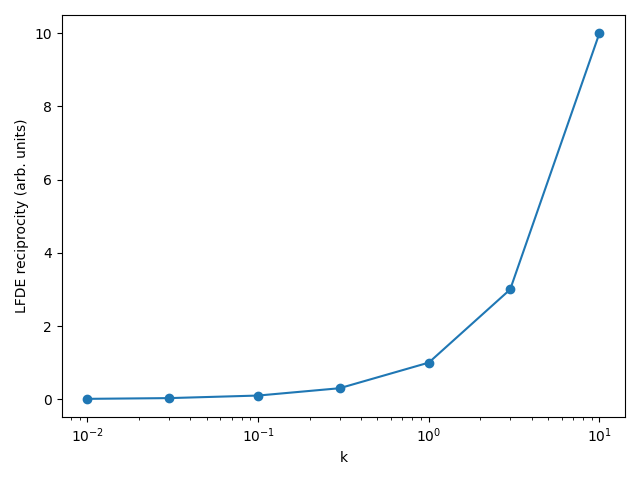

In [9]:
from IPython.display import Image, display

output_plot = cfg["lfde"]["output_plot"]
print("Showing plot from:", output_plot)

display(Image(output_plot))
